In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [112]:
#Importing the Titanic Train Dataset
train = pd.read_csv(r'C:\Users\Mohamed Gamal\OneDrive\Documents\Courses\Udemy - Python for Data Science and Machine Learning Bootcamp\13-Logistic-Regression\titanic_train.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
#Displays the dataset with cells being True if the cell content is Nan/Null

train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Data Visualization

<AxesSubplot:>

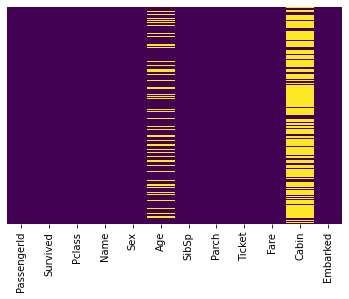

In [14]:
#Plotting Heatmap indicating the columns where the cell entries are Null
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

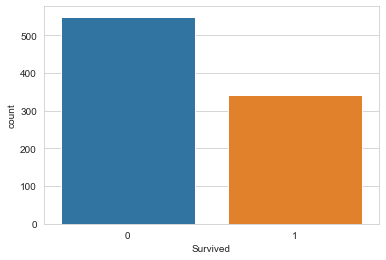

In [22]:
#Countplot to display the number of people who survived vs who did not survive

#sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

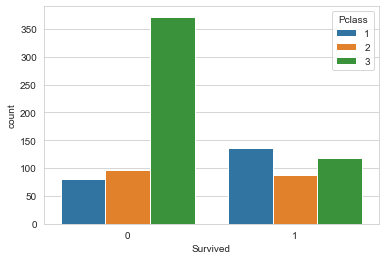

In [24]:
#Countplot for number of people who survived given their Passenger Class they were in
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

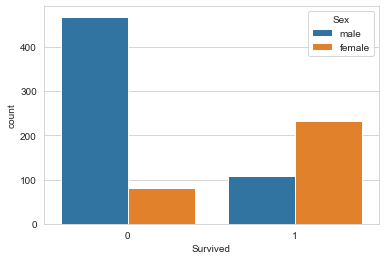

In [25]:
#Countplot for number of people who survived given their Sex Type
sns.countplot(x='Survived',hue='Sex',data=train)

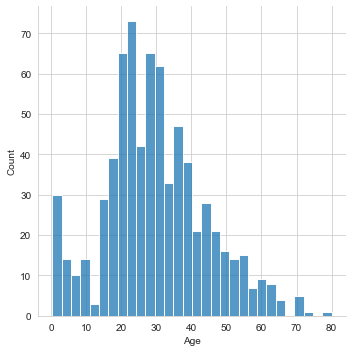

In [33]:
#Histogram plot that displays of Distribution of Ages across the Titanic Ship  
sns.displot(train['Age'].dropna(),kde=False,bins=30)

# Cleaning our Data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

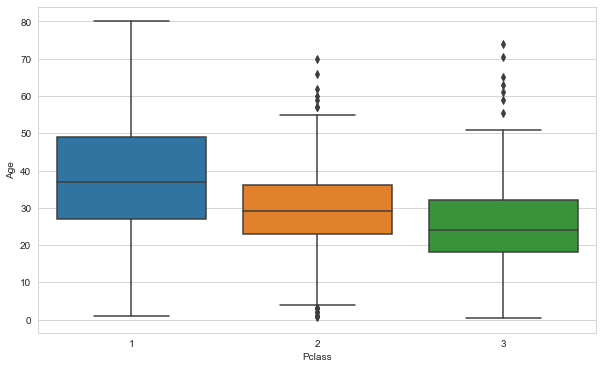

In [46]:
#Imputing the missing Age values using the Passenger Class
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [57]:
train[train['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [114]:
#Calculating the Mean of each Passenger Class

dict1 = {1:train[train['Pclass'] == 1]['Age'].mean(),2:train[train['Pclass'] == 2]['Age'].mean(),3:train[train['Pclass'] == 3]['Age'].mean()}
print(dict1)
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return dict1[Pclass]
    else:
        return Age

{1: 38.233440860215055, 2: 29.87763005780347, 3: 25.14061971830986}


In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
pd.isnull(train['Age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [116]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [117]:
train['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

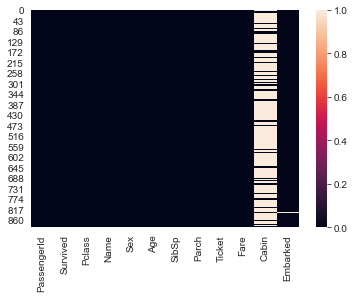

In [96]:
sns.heatmap(train.isnull())

In [119]:
# Dropping the Cabin Column as there is alot of missing data
train.drop('Cabin',axis=1,inplace=True)

In [120]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


<AxesSubplot:>

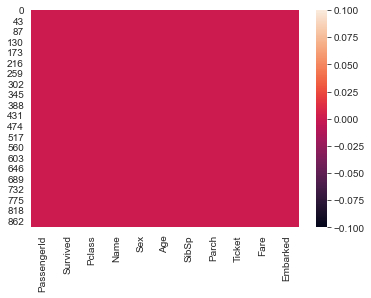

In [123]:
sns.heatmap(train.isnull())

In [122]:
# Drop any rows that have Null values
train.dropna(inplace=True)

In [124]:
#Converting categorical variable into integer variables
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [129]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [130]:
# Adding the sex, and embark columns to our trains Dataframe
train = pd.concat([train,sex,embark],axis=1)

In [131]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,1,0,0


In [133]:
# Dropped following columns as they are Strings
train.drop(['Sex','Embarked','Name','Ticket','Passenger'],axis=1,inplace=True)

In [136]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


# Creating Logistic Regression Model

In [139]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
logmodel = LogisticRegression()

In [144]:
logmodel.fit(X_train,y_train)

C:\Users\Mohamed Gamal\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [145]:
predictions = logmodel.predict(X_test)

# Evaluation Metrics

In [147]:
from sklearn.metrics import classification_report

In [149]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [150]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [151]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)